# Cluster analysis on drought 

In [100]:
#Packages:
import pandas as pd
import matplotlib.pyplot as plt

## Data prepossesing

In [101]:
# Opening file

names = ["Dis No"]

#Natural_Disasters = pd.read_csv('NaturalDisastersv3.xlsx',names=names, lineterminator='\n', nrows=25882)
Natural_Disasters = pd.read_excel('NaturalDisasters.xlsx')

In [102]:
#there are also data for technological disasters so we are choosing Natural Disasters

Natural_Disasters = Natural_Disasters[Natural_Disasters['Disaster Group']=='Natural']

#there are some natural disasters that there are very few data
Natural_Disasters = Natural_Disasters[(Natural_Disasters['Disaster Subtype']!='Landslide')& (Natural_Disasters['Disaster Subtype']!='Tsunami') & (Natural_Disasters['Disaster Subtype']!='Mudslide')&(Natural_Disasters['Disaster Subtype']!='Ground movement')&(Natural_Disasters['Disaster Subtype']!='Lava flow')& (Natural_Disasters['Disaster Subtype']!='Rockfall')& (Natural_Disasters['Disaster Subtype']!='Grasshopper')& (Natural_Disasters['Disaster Subtype']!='Locust')& (Natural_Disasters['Disaster Subtype']!='Worms')& (Natural_Disasters['Disaster Subtype']!='Subsidence')
                    & (Natural_Disasters['Disaster Subtype']!='Ash fall')]
# print( pd.unique(Natural_Disasters['Disaster Subtype'].values))
# & (Natural_Disasters['Disaster Subtype']!='Tsunami') & (Natural_Disasters['Disaster Subtype']!='Mudslide')&(Natural_Disasters['Disaster Subtype']!='Ground movement')]



#cols=["year","month","day"]
#df['date'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

In [103]:
ISO_to_Region = Natural_Disasters[['ISO','Region']].drop_duplicates(subset=['ISO', 'Region'])
ISO_to_Region = ISO_to_Region.set_index('ISO')['Region'].to_dict()
#ISO_to_Region

In [104]:
Disasters_Filtered = Natural_Disasters[(Natural_Disasters['Country']=='India')
                                      |(Natural_Disasters['Country']=='United States of America (the)')
                                      |(Natural_Disasters['ISO']=='RUS')
                                      |(Natural_Disasters['Country']=='Australia')
                                      |(Natural_Disasters['ISO']=='BRA')
                                      |(Natural_Disasters['ISO']=='CHN')
                                      |(Natural_Disasters['ISO']=='IDN')
                                      |(Natural_Disasters['ISO']=='MEX')]


#print( pd.unique(Disasters_Filtered['Country'].values))
#print( pd.unique(Natural_Disasters['Country'].values))

In [105]:
# Not a comment Disasters_Filtered

# Filtering disasters before and after 2000 

Disaster_Country_After_2000= Disasters_Filtered[(Disasters_Filtered['Year'] > 2000)&(Disasters_Filtered['Year'] < 2022)].groupby(['ISO','Disaster Subtype','Year'])['Dis No'].count().reset_index()
Disaster_Country_After_2000_pivoted = Disaster_Country_After_2000.pivot(index=['ISO','Year'], columns='Disaster Subtype', values = 'Dis No')

In [106]:
filtered = Disaster_Country_After_2000_pivoted.fillna(0)
filtered = filtered.reset_index()
filtered['Region'] = filtered['ISO'].map(ISO_to_Region)

In [107]:
Disaster_Region_After_2000= Disasters_Filtered[(Disasters_Filtered['Year'] > 2000)&(Disasters_Filtered['Year'] < 2023)].groupby(['Region','Disaster Subtype','Year'])['Dis No'].count().reset_index()
Disaster_Region_After_2000_pivoted = Disaster_Region_After_2000.pivot(index=['Region','Year'], columns='Disaster Subtype', values = 'Dis No')

In [108]:
Regions_filtered = Disaster_Region_After_2000_pivoted.reset_index()
Regions_filtered = Regions_filtered.fillna(0)
Regions_filtered = Regions_filtered.reset_index()

In [109]:
print(Natural_Disasters.columns)

Index(['Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'AID Contribution ('000 US$)', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damages ('000 US$)', 'Insured Damages, Adjusted ('000 US$)',
       'Total Damages ('000 US$)', 'Total Damages, Adjusted ('000 US$)', 'CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'],
      dtype='object')


In [110]:
Disaster_Region_After_2000

,Region,Disaster Subtype,Year,Dis No
typing.Literal[<no_default>],,,,
0,Australia and New Zealand,Coastal flood,2001,1
1,Australia and New Zealand,Convective storm,2001,1
2,Australia and New Zealand,Convective storm,2002,1
3,Australia and New Zealand,Convective storm,2003,4
4,Australia and New Zealand,Convective storm,2008,1
...,...,...,...,...
604,Southern Asia,Viral disease,2002,3
605,Southern Asia,Viral disease,2003,1
606,Southern Asia,Viral disease,2005,3


In [111]:
NND = Natural_Disasters[['Dis No','Year', 'Country', 'Location', 'Origin', 'Associated Dis', 'Associated Dis2',
       'Disaster Subtype','Disaster Subsubtype','Start Year', 'Start Month', 'Start Day','End Year', 'End Month', 'End Day','Total Deaths','Total Affected',"Total Damages ('000 US$)",]]


In [112]:
Disasters_with_origin = NND.dropna(subset = ['Origin'])

In [113]:
print(pd.unique(Disasters_with_origin['Associated Dis'].values))

[nan 'Broken Dam/Burst bank' 'Epidemic' 'Slide (land, mud, snow, rock)'
 'Rain' 'Pollution' 'Tsunami/Tidal wave' 'Flood' 'Wildfire' 'Fire'
 'Crop failure' 'Heat wave' 'Cold wave' 'Food shortage' 'Hail'
 'Transport accident' 'Famine' 'Explosion' 'Lightening' 'Water shortage'
 'Industrial accidents' 'Storm' 'Avalanche (Snow, Debris)' 'Collapse'
 'Snow/ice']


In [114]:
NND = Natural_Disasters[['Year', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Disaster Subtype','Disaster Subsubtype','Start Year', 'Start Month', 'Start Day','Total Deaths']]



NND = Natural_Disasters[['Dis No', 'Country', 'ISO', 'Region','Year', 'Country', 'Location', 'Origin', 'Associated Dis', 'Associated Dis2',
       'Disaster Subtype','Disaster Subsubtype','Start Year','Total Deaths','Total Affected',"Total Damages ('000 US$)",]]

#NND

In [115]:
Categories = NND['Disaster Subtype'].value_counts()
len(Categories)

17

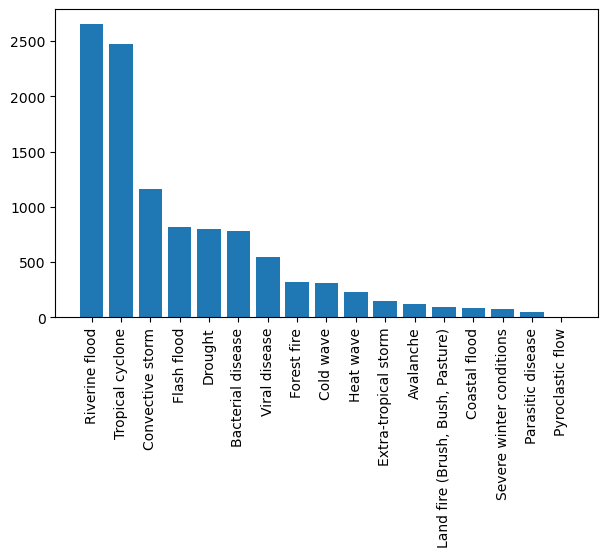

In [116]:
plt.figure(figsize = (7,4))

plt.bar(Categories.index,Categories.values)
plt.xticks(rotation=90)
plt.show()

In [117]:
Disasters_with_origin = NND.dropna(subset = ['Origin'])

In [118]:
Categories = NND['Disaster Subsubtype'].dropna().value_counts()
#Categories

In [119]:
Disaster_Country= Natural_Disasters.groupby(['ISO','Disaster Subtype'])['Dis No'].count().reset_index()
Disaster_Country_Before_1980= Natural_Disasters[Natural_Disasters['Year'] <=2000].groupby(['ISO','Disaster Subtype'])['Dis No'].count().reset_index()
Disaster_Country_After_1980= Natural_Disasters[Natural_Disasters['Year'] > 2000].groupby(['ISO','Disaster Subtype'])['Dis No'].count().reset_index()
Disaster_Country_Year= Natural_Disasters.groupby(['ISO','Disaster Subtype','Year'])['Dis No'].count()

In [120]:
Disaster_Country = Disaster_Country.reset_index()

In [121]:
Droughts = Disaster_Country[Disaster_Country['Disaster Subtype']=='Drought']
Droughts = Disaster_Country_Before_1980[Disaster_Country['Disaster Subtype']=='Drought']

/var/folders/29/htf_t1pj3m381k851l3xs9_h0000gn/T/ipykernel_8378/1783038194.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Droughts = Disaster_Country_Before_1980[Disaster_Country['Disaster Subtype']=='Drought']


In [122]:
NND

,Dis No,Country,ISO,Region,Year,Country,Location,Origin,Associated Dis,Associated Dis2,Disaster Subtype,Disaster Subsubtype,Start Year,Total Deaths,Total Affected,Total Damages ('000 US$)
0,1900-9002-CPV,Cabo Verde,CPV,Western Africa,1900,Cabo Verde,Countrywide,NaN,Famine,NaN,Drought,NaN,1900,11000.0,NaN,NaN
1,1900-9001-IND,India,IND,Southern Asia,1900,India,Bengal,NaN,NaN,NaN,Drought,NaN,1900,1250000.0,NaN,NaN
10,1904-0003-BGD,Bangladesh,BGD,Southern Asia,1904,Bangladesh,Chittagong,NaN,NaN,NaN,Tropical cyclone,NaN,1904,NaN,NaN,NaN
16,1906-0023-BEL,Belgium,BEL,Western Europe,1906,Belgium,Louvain region,NaN,NaN,NaN,NaN,NaN,1906,6.0,NaN,NaN
17,1906-0024-BEL,Belgium,BEL,Western Europe,1906,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,1906,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25876,2023-0032-USA,United States of America (the),USA,Northern America,2023,United States of America (the),Alabama and Georgia,NaN,NaN,NaN,Convective storm,Tornado,2023,11.0,49.0,NaN
25878,2023-0080-ZAF,South Africa,ZAF,Southern Africa,2023,South Africa,"Mpumalanga, the Eastern Cape, Gauteng, KwaZulu...",Heavy rains,NaN,NaN,NaN,NaN,2023,17.0,1000.0,NaN
25879,2023-0110-ZMB,Zambia,ZMB,Eastern Africa,2023,Zambia,"Namwala, Monze and Mazabuka districts",Heavy rains,NaN,NaN,Flash flood,NaN,2023,NaN,154608.0,NaN
25880,2023-0068-ZMB,Zambia,ZMB,Eastern Africa,2023,Zambia,"Chikoma, Mbande, Mzigawa, Chipanji, Mlawe, Eas...",NaN,NaN,NaN,Bacterial disease,NaN,2023,2.0,118.0,NaN


In [123]:
NND = NND[['Country', 'Region', 'Disaster Subtype', 'Start Year', 'Total Deaths', 'Total Affected']]
NND

,Country,Country,Region,Disaster Subtype,Start Year,Total Deaths,Total Affected
0,Cabo Verde,Cabo Verde,Western Africa,Drought,1900,11000.0,NaN
1,India,India,Southern Asia,Drought,1900,1250000.0,NaN
10,Bangladesh,Bangladesh,Southern Asia,Tropical cyclone,1904,NaN,NaN
16,Belgium,Belgium,Western Europe,NaN,1906,6.0,NaN
17,Belgium,Belgium,Western Europe,NaN,1906,NaN,NaN
...,...,...,...,...,...,...,...
25876,United States of America (the),United States of America (the),Northern America,Convective storm,2023,11.0,49.0
25878,South Africa,South Africa,Southern Africa,NaN,2023,17.0,1000.0
25879,Zambia,Zambia,Eastern Africa,Flash flood,2023,NaN,154608.0
25880,Zambia,Zambia,Eastern Africa,Bacterial disease,2023,2.0,118.0


In [124]:
filtered_df = NND[NND['Disaster Subtype'] == 'Drought']

In [126]:
filtered_df

,Country,Country,Region,Disaster Subtype,Start Year,Total Deaths,Total Affected
0,Cabo Verde,Cabo Verde,Western Africa,Drought,1900,11000.0,NaN
1,India,India,Southern Asia,Drought,1900,1250000.0,NaN
36,Burkina Faso,Burkina Faso,Western Africa,Drought,1910,NaN,NaN
40,Cabo Verde,Cabo Verde,Western Africa,Drought,1910,NaN,NaN
43,Gambia (the),Gambia (the),Western Africa,Drought,1910,NaN,NaN
...,...,...,...,...,...,...,...
25693,Mali,Mali,Western Africa,Drought,2022,NaN,1735753.0
25702,Malawi,Malawi,Eastern Africa,Drought,2022,NaN,2678193.0
25718,Nigeria,Nigeria,Western Africa,Drought,2022,NaN,19110398.0
25754,Sudan (the),Sudan (the),Northern Africa,Drought,2022,NaN,11839300.0


In [139]:
filtered_df = filtered_df.dropna()

In [140]:
cat_cols = ['Country', 'Region', 'Disaster Subtype']
one_hot_encoded_df = pd.get_dummies(filtered_df, columns=cat_cols)
one_hot_encoded_df = one_hot_encoded_df.astype(int)
print(one_hot_encoded_df.head())

     Start Year  Total Deaths  Total Affected  Country_Afghanistan   
100        1920        500000        20000000                    0  \
603        1965       1500000       100000000                    0   
628        1965          2000         1500000                    0   
638        1966          8000          204000                    0   
904        1973        100000         3000000                    0   

     Country_Argentina  Country_Bangladesh  Country_Brazil  Country_Burundi   
100                  0                   0               0                0  \
603                  0                   0               0                0   
628                  0                   0               0                0   
638                  0                   0               0                0   
904                  0                   0               0                0   

     Country_Chad  Country_China  ...  Region_Eastern Asia  Region_Melanesia   
100             0       

/Users/merjmalshawi/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/merjmalshawi/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/merjmalshawi/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/merjmalshawi/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

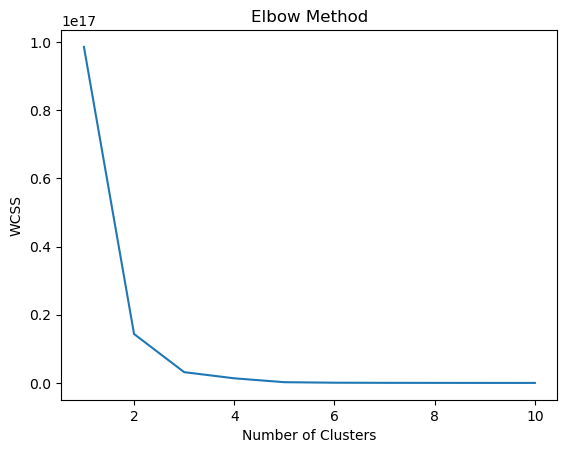

In [146]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create a list of WCSS values for each k value
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(one_hot_encoded_df)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [147]:
from sklearn.cluster import KMeans

# Set the number of clusters you want to create
num_clusters = 2

# Initialize KMeans with the number of clusters you want to create
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

# Fit KMeans to your one-hot encoded data
kmeans.fit(one_hot_encoded_df)

# Get the cluster assignments for each row in your data
cluster_assignments = kmeans.predict(one_hot_encoded_df)

/Users/merjmalshawi/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


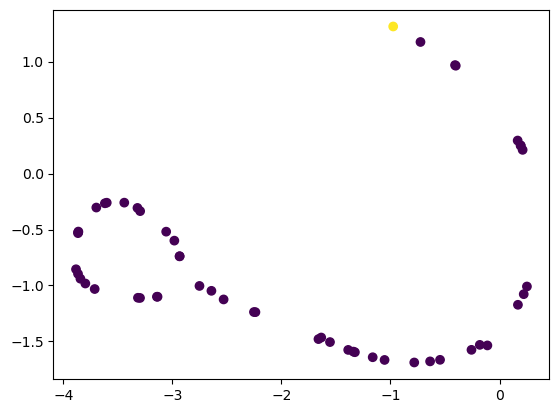

In [148]:
# Use t-SNE to reduce the dimensionality of your data to 2D
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(one_hot_encoded_df)

# Plot the clusters
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=cluster_assignments)
plt.show()

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the columns to transform
text_columns = ['Country', 'Region', 'Disaster Subtype']

# Create a TfidfVectorizer object with desired options
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english')

# Apply the vectorizer to the text columns
text_features = vectorizer.fit_transform(filtered_df[text_columns].astype(str).apply(lambda x: " ".join(x), axis=1))

# Convert the sparse matrix to a dense array
text_features_array = text_features.toarray()

# Get the feature names from the vocabulary
feature_names = list(vectorizer.vocabulary_.keys())

# Create a new dataframe with the text features
text_features_df = pd.DataFrame(text_features_array, columns=feature_names)

# Concatenate the text features with the other columns in filtered_df
filtered_df_transformed = pd.concat([filtered_df, text_features_df], axis=1)


In [90]:
filtered_df_transformed = filtered_df_transformed.drop(['Country', 'Region', 'Disaster Subtype'], axis=1)

In [95]:
filtered_df_transformed

,Start Year,Total Deaths,Total Affected,cabo,verde,western,africa,india,southern,asia,...,uruguay,syrian,tajikistan,argentina,timor,leste,saint,tuvalu,polynesia,marshall
0,1900.0,11000.0,NaN,0.0,0.120785,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.689471,0.0,0.186197,0.0,0.0,0.0,0.0
1,1900.0,1250000.0,NaN,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
36,1910.0,NaN,NaN,0.0,0.159344,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.245637,0.0,0.0,0.0,0.0
40,1910.0,NaN,NaN,0.0,0.125623,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.193654,0.0,0.0,0.0,0.0
43,1910.0,NaN,NaN,0.0,0.113282,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.174630,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,NaN,NaN,NaN,0.0,0.168973,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.260480,0.0,0.0,0.0,0.0
796,NaN,NaN,NaN,0.0,0.161543,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
797,NaN,NaN,NaN,0.0,0.132115,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.203662,0.0,0.0,0.0,0.0
798,NaN,NaN,NaN,0.0,0.164342,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


In [98]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataframe
df = filtered_df_transformed.dropna()

cols = df.columns
# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[cols])

# Set the number of clusters
n_clusters = 4

# Create an instance of the KMeans clustering algorithm
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the clustering algorithm to the scaled data
kmeans.fit(scaled_data)

# Add a new column to the dataframe with the cluster labels
df['cluster_labels'] = kmeans.labels_


/Users/merjmalshawi/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/29/htf_t1pj3m381k851l3xs9_h0000gn/T/ipykernel_8378/1005599982.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_labels'] = kmeans.labels_


In [99]:
df

,Start Year,Total Deaths,Total Affected,cabo,verde,western,africa,india,southern,asia,...,syrian,tajikistan,argentina,timor,leste,saint,tuvalu,polynesia,marshall,cluster_labels
100,1920.0,500000.0,20000000.0,0.000000,0.158814,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
603,1965.0,1500000.0,100000000.0,0.944779,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
628,1965.0,2000.0,1500000.0,0.000000,0.161543,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
638,1966.0,8000.0,204000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [96]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# create a new DataFrame with only the selected columns
data = filtered_df_transformed

# standardize the data
data_std = (data - data.mean()) / data.std()

# conduct PCA on the standardized data
pca = PCA(n_components=3)
pca.fit(data_std)
data_pca = pca.transform(data_std)

# conduct k-means clustering on the PCA-transformed data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_pca)
clusters = kmeans.predict(data_pca)

# add the cluster labels to the original DataFrame
filtered_df['Cluster'] = clusters

# plot the results in 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca[:,0], data_pca[:,1], data_pca[:,2], c=clusters, cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [78]:
filtered_df

,Dis No,Country,Country,Region,Disaster Subtype,Start Year,Total Deaths,Total Affected
0,1900-9002-CPV,Cabo Verde,Cabo Verde,Western Africa,Drought,1900,11000.0,NaN
1,1900-9001-IND,India,India,Southern Asia,Drought,1900,1250000.0,NaN
36,1910-9006-BFA,Burkina Faso,Burkina Faso,Western Africa,Drought,1910,NaN,NaN
40,1910-9006-CPV,Cabo Verde,Cabo Verde,Western Africa,Drought,1910,NaN,NaN
43,1910-9006-GMB,Gambia (the),Gambia (the),Western Africa,Drought,1910,NaN,NaN
...,...,...,...,...,...,...,...,...
25693,2022-9786-MLI,Mali,Mali,Western Africa,Drought,2022,NaN,1735753.0
25702,2022-9785-MWI,Malawi,Malawi,Eastern Africa,Drought,2022,NaN,2678193.0
25718,2022-9787-NGA,Nigeria,Nigeria,Western Africa,Drought,2022,NaN,19110398.0
25754,2022-9788-SDN,Sudan (the),Sudan (the),Northern Africa,Drought,2022,NaN,11839300.0
